In [1]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMAResults
from matplotlib import pyplot
import numpy
import pandas

# LOAD DATA

In [8]:
series = read_csv('ihk_new.csv', index_col=0, squeeze=True)

# DIFFERENCING

In [9]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

In [10]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# IMPORT MODEL

In [18]:
model_fit = ARIMAResults.load('model.pkl')

month_in_year = 12
differenced = difference(series, 12)

start_index = len(differenced)
end_index = start_index + 11
forecast = model_fit.predict(start=start_index, end=end_index)

# PREDICTION

In [19]:
history = [x for x in series]
list_result = []
month = 1

for yhat in forecast:
    inverted = inverse_difference(history, yhat, month_in_year)
    print('Month %d: %f' % (month, inverted))
    history.append(inverted)
    list_result.append(inverted)
    month += 1

Month 1: 133.935328
Month 2: 134.048226
Month 3: 133.993048
Month 4: 134.143712
Month 5: 134.462900
Month 6: 135.475412
Month 7: 135.864721
Month 8: 135.640544
Month 9: 135.879366
Month 10: 136.525362
Month 11: 137.368331
Month 12: 138.132621


# PLOTTING

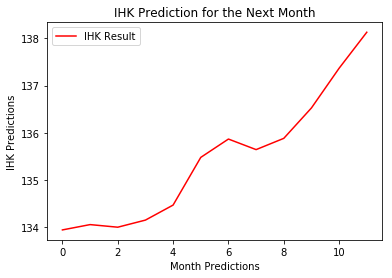

In [15]:
list_to_series = pandas.Series(list_result)

pyplot.plot(list_result, color='red', label='IHK Result')
pyplot.xlabel("Month Predictions")
pyplot.ylabel("IHK Predictions")
pyplot.title("IHK Prediction for the Next Month")
pyplot.legend()
pyplot.show()